In [1]:
from os.path import join as pjoin
import sys 
sys.path.append('/home/hhansen/DecontextEmbeddings')
import os 
os.environ['EMBEDDING_EVALUATION_DATA_PATH'] = '/home/hhansen/DecontextEmbeddings/helpers/embedding_evaluation/data/'
DATA_DIR = '/home/hhansen/DecontextEmbeddings/data'
os.environ['DATA_DIR'] = DATA_DIR
FIGURE_OUTPUT_DIR = pjoin(DATA_DIR, 'figures', 'things_stats')

import pandas as pd
import matplotlib.pyplot as plt

from helpers.data import load_embedding_to_df
from helpers.things_evaluation.evaluate import read_embeddings
from helpers.plot import set_style_and_font_size

set_style_and_font_size()

/home/hhansen/decon/decon_env/DecontextEmbeddings/data


In [2]:
def missing_things(df):
    words = set(pd.read_csv(f'{DATA_DIR}/things/things_concepts.tsv', sep='\t')['uniqueID'])
    missing = words.difference(df.index)
    print(missing)
    print(f'{len(missing)} missing of {len(words)}')

def stats_things(corpus_folder):
    matchings = ['word', 'synset', 'main_word', 'concept_id']
    dfs = []
    for matching in matchings:
        print(f'Matching: {matching}')
        path = f'{EMBEDDING_DATA_DIR}/thinga/{corpus_folder}/decontext/bert-base/1/{matching}/mean/1/decontext.txt'
        df = read_embeddings(path, matching, keep_n_contexts=True)[['n_contexts']]
        df = df.sort_values(by='n_contexts', ascending=False)
        dfs.append(df)
        
        total = df['n_contexts'].sum()
        print(f'Total number of embeddings: {total}')
        print(f'{df.shape[0]} concepts found')
        #print(df['n_contexts'].describe())
        missing_things(df)

    return dfs

In [3]:
def plot_hist(df_word, df_synset, df_main_word, df_concept_id):
    fig, axes = plt.subplots(1,4, figsize=(10,3), sharey=True, sharex=True)
    axes[0].hist(df_word['n_contexts'], bins=200)
    axes[1].hist(df_synset['n_contexts'], bins=200)
    axes[2].hist(df_main_word['n_contexts'], bins=200)
    axes[3].hist(df_concept_id['n_contexts'], bins=200)
    axes[0].set_ylabel('number of words')
    axes[0].set_xlabel('number of contexts')
    axes[0].set_title('per word')
    axes[1].set_title('per word sense')
    axes[2].set_title('per concept')
    axes[3].set_title('per synset')

def plot_boxplot(df_word, df_synset, df_main_word, df_concept_id):
    fig, axes = plt.subplots(1,1, figsize=(11.69,5), sharey=True, sharex=True)
    axes.boxplot([df_word['n_contexts'], df_synset['n_contexts'], df_main_word['n_contexts'], df_concept_id['n_contexts']], vert=False)
    axes.set_yticks([1,2,3,4])
    axes.set_yticklabels(['word', 'word sense', 'concept', 'synset'])
    axes.set_xlabel('number of contexts')


In [4]:
df_word, df_synset, df_main_word, df_concept_id = stats_things('wikidumps')

Matching: word
Total number of embeddings: 1607766
1852 concepts found
{'ticktacktoe', 'iceskate'}
2 missing of 1854
Matching: synset
Total number of embeddings: 820555
1084 concepts found
{'piano', 'teacup', 'fox', 'van', 'nose', 'drill', 'tank1', 'wing', 'fire_pit', 'swab', 'cable', 'cardinal', 'fingerprint', 'fork', 'scrabble', 'riser', 'grille', 'heater', 'table', 'chest2', 'pine_tree', 'baton4', 'pants', 'hairspray', 'cushion', 'jeans', 'pearl', 'sandbox', 'cap', 'sim_card', 'crab', 'curb', 'powder', 'burner', 'telegraph', 'yoke', 'roll', 'stew', 'chihuahua', 'wasp', 'bolt', 'boomerang', 'globe', 'fire', 'shell2', 'spareribs', 'scallop', 'raccoon', 'stretcher', 'rag', 'alpaca', 'plunger', 'car', 'nest', 'pedal', 'home_plate', 'rack2', 'gauge', 'rabbit', 'helmet', 'lawnmower', 'vacuum', 'truck', 'spring_roll', 'knitting', 'quill', 'glove', 'loom', 'pipe2', 'boar', 'fig', 'blowfish', 'blueberry', 'tattoo', 'walker1', 'rim', 'branch', 'swordfish', 'tweezers', 'banana', 'peg', 'rope',

Total number of embeddings: 803915
1017 concepts found
{'teacup', 'dresser', 'fox', 'van', 'medal', 'extinguisher', 'drill', 'tank1', 'wing', 'fire_pit', 'swab', 'cardinal', 'fingerprint', 'fork', 'scrabble', 'riser', 'grille', 'table', 'chest2', 'baton4', 'eggshell', 'pants', 'hairspray', 'cushion', 'pearl', 'vial', 'cap', 'sim_card', 'crab', 'powder', 'tarp', 'burner', 'telegraph', 'roll', 'yoke', 'pine_needle', 'hot_chocolate', 'stew', 'chihuahua', 'stroller', 'bolt', 'globe', 'cellphone', 'fire', 'shell2', 'spareribs', 'scallop', 'stretcher', 'magnifying_glass', 'alpaca', 'toilet_paper', 'nest', 'home_plate', 'rack2', 'taxi', 'christmas_card', 'gauge', 'rabbit', 'helmet', 'lawnmower', 'truck', 'vacuum', 'spring_roll', 'quill', 'glove', 'loom', 'floss', 'pipe2', 'boar', 'fig', 'blowfish', 'blueberry', 'tattoo', 'walker1', 'rim', 'branch', 'swordfish', 'tweezers', 'banana', 'chainsaw', 'peg', 'rope', 'lightning_bug', 'mantle', 'sheet', 'barcode', 'cherry', 'mouth', 'airboat', 'chaps'

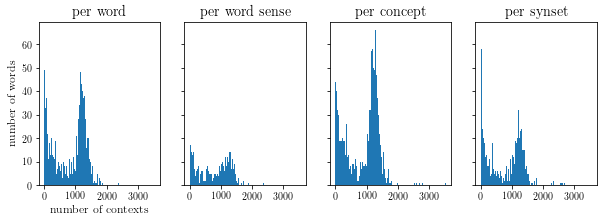

In [5]:
plot_hist(df_word, df_synset, df_main_word, df_concept_id)
plt.savefig(f'things_wikidumps_hist.pdf', bbox_inches='tight')


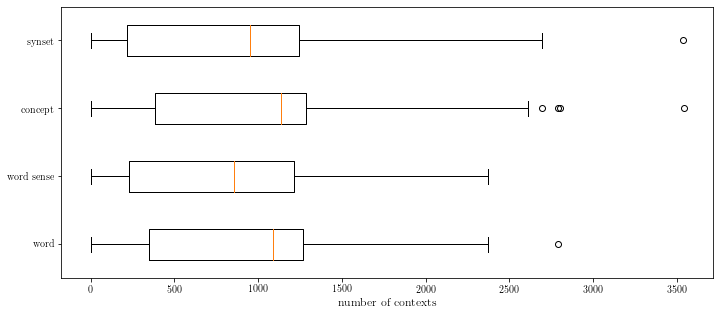

In [6]:
plot_boxplot(df_word, df_synset, df_main_word, df_concept_id)
plt.savefig(f'things_wikidumps_boxpot.pdf', bbox_inches='tight')
